#  Deep Learning Hyper-parameters

## Regularization

In [1]:
#import the packages
import pandas as pd
import numpy as np

The data set

In [2]:
x=[-0.99768,-0.69574,-0.40373,-0.10236,0.22024,0.47742,0.82229]
y=[2.0885,1.1646,0.3287,0.46013,0.44808,0.10013,-0.32952]

input_data = pd.DataFrame(list(zip(x, y)), columns =['x', 'y']) 
print(input_data)

         x        y
0 -0.99768  2.08850
1 -0.69574  1.16460
2 -0.40373  0.32870
3 -0.10236  0.46013
4  0.22024  0.44808
5  0.47742  0.10013
6  0.82229 -0.32952


Plotting the data

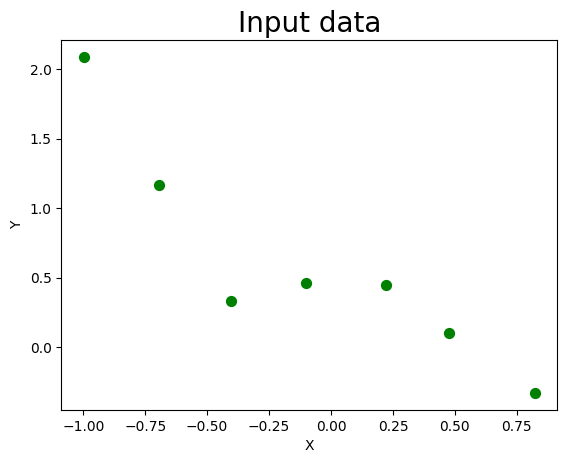

In [3]:
x = np.array(input_data.x)
y = input_data.y
#scatter plot x and y
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Input data", fontsize=20)
plt.scatter(x,y,s=50,c="g")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Usual Regression Model building - Without Regualrization

#### Simple Linear Regression

In [4]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
m1 = sm.OLS(y,x1).fit()
#SSE
print("m1 SSE", m1.ssr)

m1 SSE 0.7107401451797565


#### Second Order polynomial regression

In [5]:
x2 = sm.add_constant(np.column_stack([x,np.square(x)]))
m2 = sm.OLS(y,x2).fit()
print("m2 SSE", m2.ssr)

m2 SSE 0.457231720521299


#### Fifth order polynomial

In [6]:
x3 = sm.add_constant(np.column_stack([x, np.power(x,2),np.power(x,3),np.power(x,4),np.power(x,5)]))
m3 = sm.OLS(y,x3).fit()
print("m3 SSE", m3.ssr)

m3 SSE 0.010562888801624653


### Regression Model building - With Regualrization

In [9]:
X = x3
y = np.array(y)
n_col = X.shape[1]
d = np.identity(n_col)
d[0,0] = 0
w = []

reg =0 
w.append(np.linalg.lstsq(X.T.dot(X) + reg * d, X.T.dot(y), rcond=None)[0])

reg =1 
w.append(np.linalg.lstsq(X.T.dot(X) + reg * d, X.T.dot(y), rcond=None)[0])


reg =10 
w.append(np.linalg.lstsq(X.T.dot(X) + reg * d, X.T.dot(y), rcond=None)[0])


In [10]:
print("Regularized weights  lambda=0 \n", w[0])
print("Regularized weights  lambda=1 \n", w[1])
print("Regularized weights  lambda=10 \n", w[2])

Regularized weights  lambda=0 
 [ 0.47252877  0.68135289 -1.38012842 -5.97768747  2.44173268  4.73711433]
Regularized weights  lambda=1 
 [ 0.3975953  -0.42066637  0.12959211 -0.3974739   0.17525553 -0.33938772]
Regularized weights  lambda=10 
 [ 0.52047074 -0.18250706  0.06064258 -0.14817721  0.07433006 -0.12795737]


In [11]:
#new weights and older weights
print("Regularized Weights With lambda = 0 \n", list(w[0]))
print("Standard Weights With inbuilt package \n",list(m3.params))

Regularized Weights With lambda = 0 
 [0.4725287728743485, 0.6813528948567926, -1.3801284186125533, -5.977687467469867, 2.4417326847935366, 4.737114334831721]
Standard Weights With inbuilt package 
 [0.47252877287433903, 0.681352894856763, -1.380128418612447, -5.97768746746967, 2.4417326847933905, 4.737114334831507]


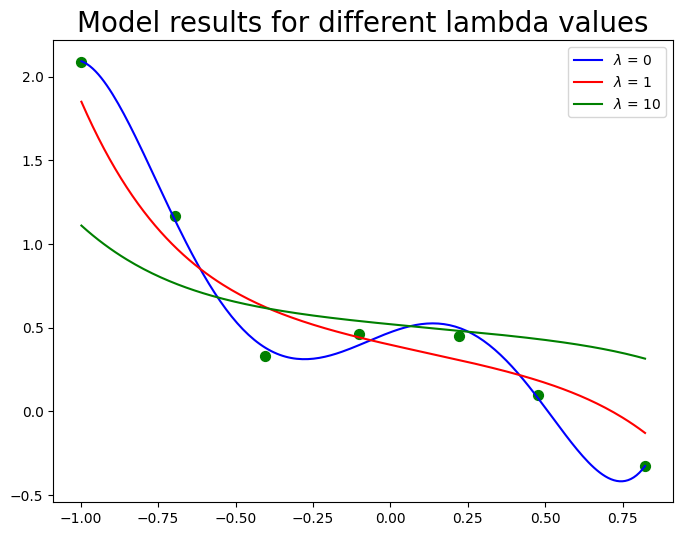

In [12]:
#ploat all these three models
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Model results for different lambda values', fontsize=20)
plt.scatter(x,y, s = 50, c = "g")
x_new = np.linspace(x.min(), x.max(), 200)
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[0]), 5))(x_new),label='$\lambda$ = 0', c = "b")
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[1]), 5))(x_new),label='$\lambda$ = 1', c = "r")
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[2]), 5))(x_new),label='$\lambda$ = 10', c = "g")
plt.legend(loc='upper right');
plt.show()

#### Choosing the regularization λ

In [13]:
#weights
print("Final Weights \n", w[1])
#perdiction
pred = X.dot(w[1])
##SSE
SSE_Final = sum(np.square(y-pred))
print("Final SSE ", SSE_Final)

Final Weights 
 [ 0.3975953  -0.42066637  0.12959211 -0.3974739   0.17525553 -0.33938772]
Final SSE  0.24363202160352654


## Regularization in Keras

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-04-15 20:36:22.518899: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-15 20:36:22.535132: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-15 20:36:22.540437: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-15 20:36:22.553574: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-15 20:36:23.354613: W tensorflow/compiler/tf2

In [15]:
## MNIST data The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


## Model without Regularization 

In [17]:
model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8050 - loss: 0.7114
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9434 - loss: 0.1870
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9612 - loss: 0.1274
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9728 - loss: 0.0914
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9789 - loss: 0.0730
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9822 - loss: 0.0575
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9844 - loss: 0.0498
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9881 - loss: 0.0397
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9893 - loss: 0.0341
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9909 - loss: 0.0296


In [19]:
#Final Results
loss, acc = model.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

1875/1875 - 1s - 778us/step - accuracy: 0.9915 - loss: 0.0275
Train Accuracy: 99.15%
313/313 - 0s - 883us/step - accuracy: 0.9768 - loss: 0.0812
Test Accuracy: 97.68%


## Model with Regularization 

In [20]:
from tensorflow.keras import regularizers
model_r = keras.Sequential()
model_r.add(layers.Input(shape=(784,)))
model_r.add(layers.Dense(256, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
model_r.add(layers.Dense(128, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))
model_r.add(layers.Dense(10, activation='softmax'))
model_r.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model_r.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_r.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5397 - loss: 2.3284
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7427 - loss: 1.3713
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7576 - loss: 1.2547
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7619 - loss: 1.2079
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7688 - loss: 1.1671
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7752 - loss: 1.1343
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7923 - loss: 1.0920
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8018 - loss: 1.0617
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8098 - loss: 1.0331
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8147 - loss: 1.0075


In [22]:
#Final Results
loss, acc = model_r.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model_r.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

1875/1875 - 1s - 709us/step - accuracy: 0.8030 - loss: 1.0113
Train Accuracy: 80.30%
313/313 - 0s - 939us/step - accuracy: 0.8060 - loss: 0.9948
Test Accuracy: 80.60%


## Model with Dropout 

In [23]:
from tensorflow.keras.layers import Dropout
model_rd = keras.Sequential()

model_rd.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model_rd.add(Dropout(0.7))

model_rd.add(layers.Dense(128, activation='sigmoid'))
model_rd.add(Dropout(0.6))

model_rd.add(layers.Dense(10, activation='softmax'))
model_rd.summary()

/store/venv/da5401/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_rd.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_rd.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5564 - loss: 1.3196
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8621 - loss: 0.4658
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8843 - loss: 0.4085
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9039 - loss: 0.3492
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9084 - loss: 0.3235
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9182 - loss: 0.2985
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9181 - loss: 0.3057
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9233 - loss: 0.2876
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9273 - loss: 0.2751
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9290 - loss: 0.2698


In [25]:
#Final Results
loss, acc = model_rd.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model_rd.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

1875/1875 - 1s - 728us/step - accuracy: 0.9611 - loss: 0.1412
Train Accuracy: 96.11%
313/313 - 0s - 889us/step - accuracy: 0.9582 - loss: 0.1512
Test Accuracy: 95.82%


## Early Stopping

In [26]:
model_re = keras.Sequential()
model_re.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model_re.add(layers.Dense(128, activation='sigmoid'))
model_re.add(layers.Dense(10, activation='softmax'))
model_re.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_re.compile(loss='categorical_crossentropy', metrics=['accuracy'])
#Enable saving checkpoints
# Checkpoint the weights when validation accuracy improves
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py

# checkpoint
#dont forget to create a directory to store the checkpoints:"early_stopping_checkpoints"
checkpoint = ModelCheckpoint(r"/tmp/epoch-{epoch:02d}.keras")
model_re.fit(x_train, y_train,epochs=10,validation_data=(x_test, y_test),callbacks=[checkpoint])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8071 - loss: 0.7059 - val_accuracy: 0.9343 - val_loss: 0.2146
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9424 - loss: 0.1890 - val_accuracy: 0.9557 - val_loss: 0.1437
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9619 - loss: 0.1278 - val_accuracy: 0.9663 - val_loss: 0.1071
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9720 - loss: 0.0930 - val_accuracy: 0.9704 - val_loss: 0.0944
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9777 - loss: 0.0758 - val_accuracy: 0.9734 - val_loss: 0.0866
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9813 - loss: 0.0606 - val_accuracy: 0.9749 - val_loss: 0.0806
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9851 - loss: 0.0490 - val_accuracy: 0.9777 - val_loss: 0.0736
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9874 - loss: 0.0407 - 

In [ ]:
model_re.load_weights(r"/tmp/epoch-07.keras")# change the file name to the epoch you want to load

In [30]:
model_re = keras.Sequential()
model_re.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model_re.add(layers.Dense(128, activation='sigmoid'))
model_re.add(layers.Dense(10, activation='softmax'))

model_re.compile(loss='categorical_crossentropy', metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              min_delta=0.01,
                              patience=2)

#train the model with call back method
model_re.fit(x_train, y_train, epochs=30,validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8047 - loss: 0.7094 - val_accuracy: 0.9346 - val_loss: 0.2138
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9437 - loss: 0.1862 - val_accuracy: 0.9595 - val_loss: 0.1368
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9608 - loss: 0.1255 - val_accuracy: 0.9705 - val_loss: 0.1001
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9720 - loss: 0.0910 - val_accuracy: 0.9724 - val_loss: 0.0894
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9774 - loss: 0.0729 - val_accuracy: 0.9738 - val_loss: 0.0843


## Activation Functions

In [31]:
model2 = keras.Sequential()
model2.add(layers.Dense(15, activation='sigmoid', input_shape=(784,)))
model2.add(layers.Dense(15, activation='relu'))
model2.add(layers.Dense(15, activation='tanh'))
model2.add(layers.Dense(15, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 15)             │        11,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,655 (49.43 KB)

 Trainable params: 12,655 (49.43 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 740us/step - accuracy: 0.5940 - loss: 1.2156
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - accuracy: 0.9011 - loss: 0.3614
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.9192 - loss: 0.2845
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.9356 - loss: 0.2311
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 821us/step - accuracy: 0.9394 - loss: 0.2108
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - accuracy: 0.9438 - loss: 0.1906
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - accuracy: 0.9476 - loss: 0.1810
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.9514 - loss: 0.1670
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.9536 - loss: 0.1614
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - accuracy: 0.9525 - loss: 0.1574


## Learning Rate

In [34]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#High Learning Rate
opt_new = tf.keras.optimizers.SGD(learning_rate=10.)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

/store/venv/da5401/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.2868 - loss: 2.0678
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.7094 - loss: 0.9419
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.7853 - loss: 0.7650
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.8390 - loss: 0.5837
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 577us/step - accuracy: 0.8440 - loss: 0.5583
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.8680 - loss: 0.4909
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.8681 - loss: 0.4890
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.8628 - loss: 0.4879
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.8727 - loss: 0.4755
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.8590 - loss: 0.5043
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.8820 - loss: 0.4281
Epoch 12

In [35]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#Low learning rate
opt_new = tf.keras.optimizers.SGD(learning_rate=0.00001)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.0982 - loss: 2.4547
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.0947 - loss: 2.4490
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.0983 - loss: 2.4435
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.0989 - loss: 2.4374
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.0979 - loss: 2.4341
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.0994 - loss: 2.4308
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - accuracy: 0.0982 - loss: 2.4265
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.0988 - loss: 2.4194
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.0973 - loss: 2.4197
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.0963 - loss: 2.4196
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.0958 - loss: 2.4131
Epoch 12

In [36]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#Optimal learning rate
opt_new = tf.keras.optimizers.SGD(learning_rate=0.01)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.1596 - loss: 2.2932
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.4584 - loss: 2.1355
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.5902 - loss: 1.7586
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.6705 - loss: 1.3166
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - accuracy: 0.7504 - loss: 1.0164
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.7955 - loss: 0.8244
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.8224 - loss: 0.7022
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.8387 - loss: 0.6173
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.8546 - loss: 0.5599
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.8602 - loss: 0.5197
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.8697 - loss: 0.4801
Epoch 12

## Momentum

In [37]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#Optimal learning rate
opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.2294 - loss: 2.2648
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.4939 - loss: 1.7876
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.7034 - loss: 1.1591
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.8166 - loss: 0.7846
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.8584 - loss: 0.6035
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.8756 - loss: 0.5009
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.8887 - loss: 0.4342
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.8959 - loss: 0.3931
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.9023 - loss: 0.3652
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.9071 - loss: 0.3428
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.9102 - loss: 0.3255
Epoch 12

## Mini batch Gradient Descent

In [38]:
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(20, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()


opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Batch size=fll data(GD)
model4.fit(x_train, y_train,batch_size=x_train.shape[0], epochs=10)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step - accuracy: 0.1044 - loss: 2.4625
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.1044 - loss: 2.4229
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.1044 - loss: 2.3975
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.1044 - loss: 2.3784
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.1044 - loss: 2.3628
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.1044 - loss: 2.3496
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.1048 - loss: 2.3379
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.1062 - loss: 2.3275
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.1106 - loss: 2.3179
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.1174 - loss: 2.3090


In [39]:
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(20, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()


opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Batch size=1 (SGD)
model4.fit(x_train, y_train,batch_size=1, epochs=2)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 30s 496us/step - accuracy: 0.7839 - loss: 0.7793
Epoch 2/2
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 30s 505us/step - accuracy: 0.9167 - loss: 0.3367


In [40]:
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(20, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()


opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Batch size = 512
model4.fit(x_train, y_train,batch_size=512, epochs=10)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1671 - loss: 2.3275
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5764 - loss: 1.7996
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7270 - loss: 1.4004
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7930 - loss: 1.0748
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8406 - loss: 0.8261
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8692 - loss: 0.6526
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8846 - loss: 0.5282
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8926 - loss: 0.4485
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9013 - loss: 0.3887
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9070 - loss: 0.3467
